In [1]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

### load the dataset
dataset = np.loadtxt('Base_Clientes Alemanes.csv', delimiter=',', skiprows=1)

# split our dataset into training / testing sets
train, test = train_test_split(dataset, test_size = 0.30)


In [2]:
variables = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66]


In [3]:
x_train=train[:,variables]
x_train.shape


(700, 67)

In [4]:
y_train=train[:,67]
y_train.shape

(700,)

In [5]:
x_test=test[:,variables]
x_test.shape

(300, 67)

In [6]:
y_test=test[:,67]
y_test.shape

(300,)

In [19]:
from keras import models
from keras import layers
from keras import optimizers
from keras import initializers
from keras.callbacks import ModelCheckpoint
from livelossplot import PlotLossesKeras

1) Modelo regresión logística

In [8]:
# Model definition
model_logreg = models.Sequential()
# Output layer
model_logreg.add(layers.Dense(1, activation='sigmoid'))
# compile the model
model_logreg.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

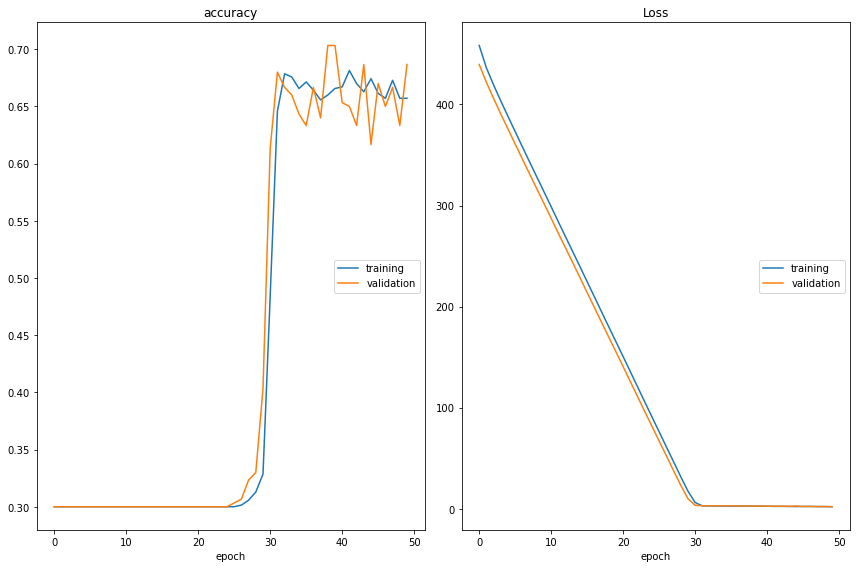

accuracy
	training         	 (min:    0.300, max:    0.681, cur:    0.657)
	validation       	 (min:    0.300, max:    0.703, cur:    0.687)
Loss
	training         	 (min:    2.009, max:  458.333, cur:    2.009)
	validation       	 (min:    2.094, max:  439.538, cur:    2.094)


In [9]:
# Entrenamiento del modelo

fit_logreg = model_logreg.fit(x_train, 
          y_train, 
          batch_size = 100,
          epochs=50, 
          verbose=0, 
          validation_data=(x_test, y_test), 
          callbacks=[PlotLossesKeras()],
         )

2) Modelo con una capa densa

In [35]:
# Model definition
model = models.Sequential()
# Layer 1
model.add(layers.Dense(200, activation='sigmoid', input_shape=(x_train.shape[1],),
                       kernel_initializer=initializers.RandomNormal(stddev=0.01),
                        bias_initializer=initializers.Zeros()))
# Output layer
model.add(layers.Dense(1, activation='sigmoid',
                       kernel_initializer=initializers.RandomNormal(stddev=0.01),
                        bias_initializer=initializers.Zeros()))
# compile the model
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])


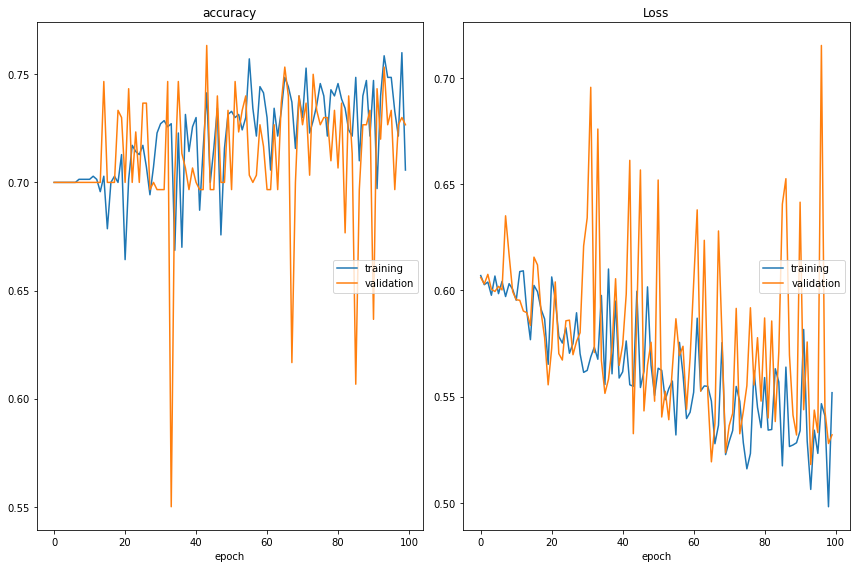

accuracy
	training         	 (min:    0.664, max:    0.760, cur:    0.706)
	validation       	 (min:    0.550, max:    0.763, cur:    0.727)
Loss
	training         	 (min:    0.498, max:    0.610, cur:    0.552)
	validation       	 (min:    0.518, max:    0.715, cur:    0.532)


In [37]:
# Entrenamiento del modelo

fit = model.fit(x_train, 
          y_train, 
          batch_size = 100,
          epochs=100, 
          verbose=0, 
          validation_data=(x_test, y_test), 
          callbacks=[PlotLossesKeras()],
         )

3) Modelo dos capas densas

In [29]:
# Model definition
model = models.Sequential()
# Layer 1
model.add(layers.Dense(10, activation='sigmoid', input_shape=(x_train.shape[1],)))
# Layer 2
model.add(layers.Dense(10, activation='sigmoid'))
# Output layer
model.add(layers.Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])


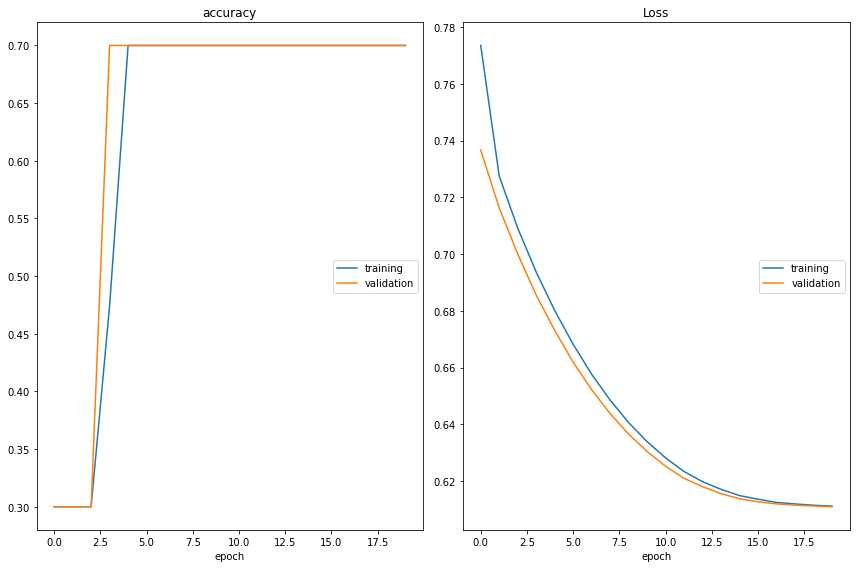

accuracy
	training         	 (min:    0.300, max:    0.700, cur:    0.700)
	validation       	 (min:    0.300, max:    0.700, cur:    0.700)
Loss
	training         	 (min:    0.611, max:    0.774, cur:    0.611)
	validation       	 (min:    0.611, max:    0.737, cur:    0.611)


In [30]:
# Entrenamiento del modelo

fit = model.fit(x_train, 
          y_train, 
          batch_size = 100,
          epochs=20, 
          verbose=0, 
          validation_data=(x_test, y_test), 
          callbacks=[PlotLossesKeras()],
         )

4) Modelo con radial basis function